#   Credit Risk Analyzer with AI 


## Import Libraries


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plot
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

## Load Data

In [105]:
credRisk ="./credit_data.csv"
data = pd.read_csv(credRisk, sep=",")

## Data Information

In [106]:
data.head(5)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


In [107]:
data.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
age                  50636 non-null int64
gender               50636 non-null object
education            50636 non-null object
occupation           50636 non-null object
organization_type    50636 non-null object
seniority            50636 non-null object
annual_income        50636 non-null int64
disposable_income    50636 non-null int64
house_type           50636 non-null object
vehicle_type         50636 non-null object
marital_status       50636 non-null object
no_card              50636 non-null int64
default              50636 non-null int64
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


## Exploratory Data Analysis
### Observations
* Column no_card consists of outliers - As no_card is a binary variable, it cannot have 2.
* Most of the customers are between 20-30 years age group.
* No. of Salaried customers are much higher than other three categories.


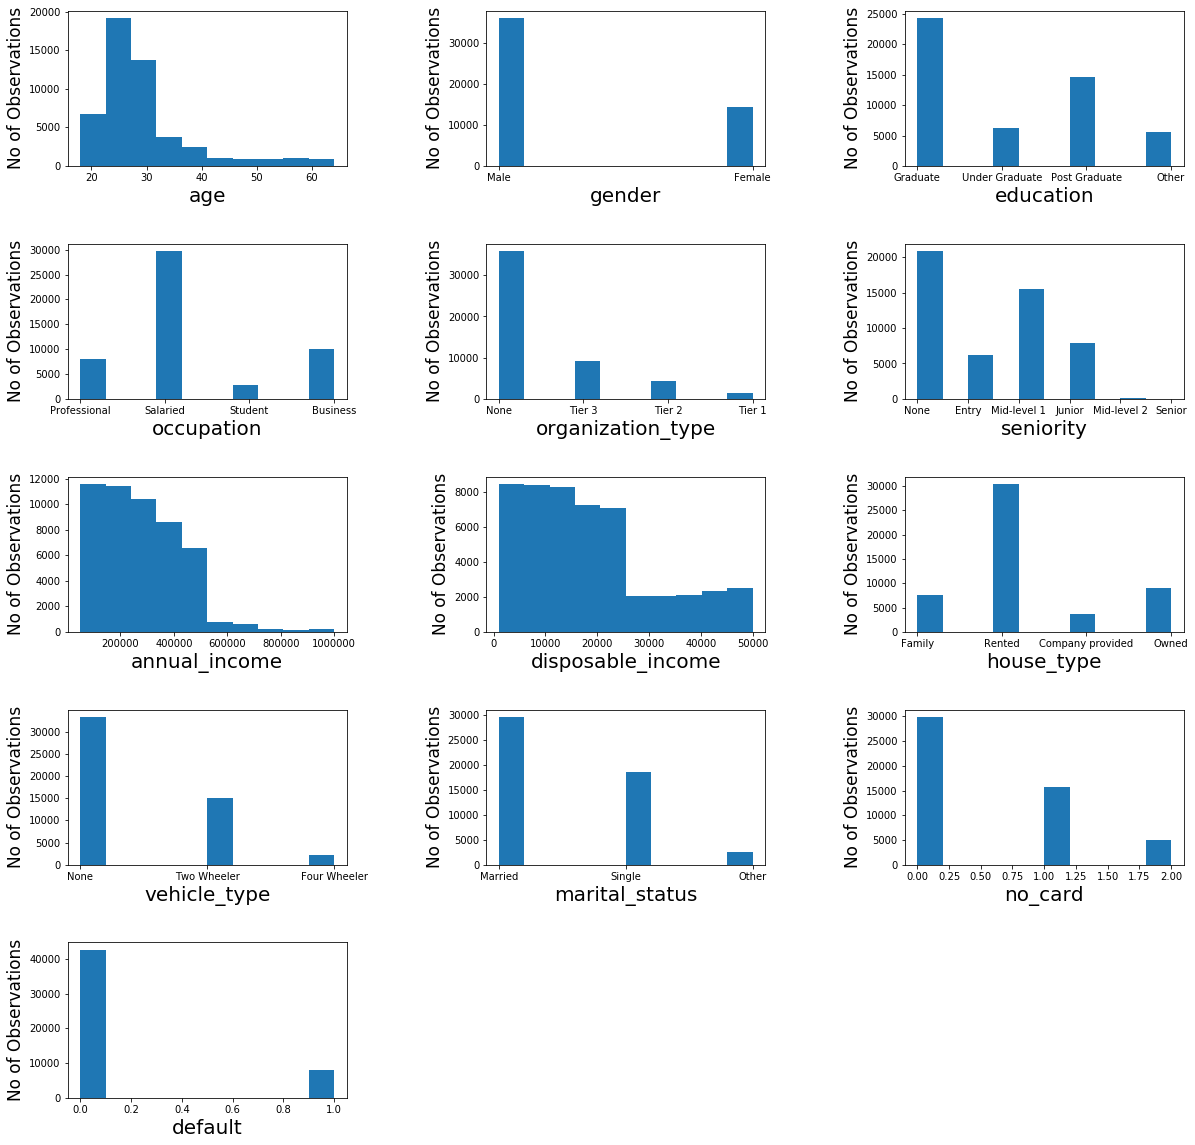

In [109]:
fig = plot.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, columns in zip(range(1, 14),data.columns):
    ax = fig.add_subplot(5, 3, i)
    ax.hist(data[columns])
    plot.xlabel(columns, fontsize="20")
    plot.ylabel('No of Observations', fontsize="17")

## Convert Categorical data to Numerical data

In [110]:
columns=data[['gender','education','occupation','organization_type','seniority','house_type','vehicle_type','marital_status']]

In [111]:
def Cat_conversion(cols):
    for i in cols:
        data[i]=data[i].astype("category").cat.codes
Cat_conversion(columns)
data.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


# Split data using train_test_split Method

![title](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

In [112]:
data_train,data_test=train_test_split(data,test_size=0.3,random_state=1)

In [113]:
x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

y_train=data_train['default']
y_test=data_test['default']

## Create Decision Tree Model (Entropy Criterion)

In [114]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

## Create Decision Tree Model (Gini Criterion)

In [115]:
dtree.gini=DecisionTreeClassifier(criterion='gini',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

## Train Decision Tree Model (Entropy Criterion)

In [116]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [117]:
y_pred_entropy=dtree.predict(x_test)
y_pred_entropy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
Score_entropy=accuracy_score(y_test,y_pred_entropy)
print("Accuracy: %0.2f" % (round(Score_entropy*100,2)))

Accuracy: 83.92


## Train Decision Tree Model (Gini Criterion)

In [119]:
dtree.gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [120]:
y_pred_gini=dtree.gini.predict(x_test)
y_pred_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
Score_gini=accuracy_score(y_test,y_pred_gini)
print("Accuracy: %0.2f" % (round(Score_gini*100,2)))

Accuracy: 84.08


## K-Fold Cross Validation
![title](https://miro.medium.com/max/1886/1*IjKy-Zc9zVOHFzMw2GXaQw.png)

## Train Decision Tree Model using K-Fold Method (Entropy Criterion)
* K-Fold (4-Fold) Cross validation to attain high accuracy
* Predict data for every fold
* Picking average of scores

In [122]:
Score_entropy = []
kfold= KFold(n_splits=4, random_state=1, shuffle=True)
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.fit(x_train,y_train)
    y_pred_entropy=dtree.predict(x_test)
    
    Score_entropy.append(accuracy_score(y_test,y_pred_entropy))
    

In [123]:
print("Accuracy: %0.2f (+/- %0.3f)" % (round(np.mean(Score_entropy)*100,2), np.std(Score_entropy*2)))

Accuracy: 84.29 (+/- 0.003)


## Train Decision Tree Model (Gini Criterion)
* K-Fold (4-Fold) Cross validation to attain high accuracy
* Predict data for every fold
* Picking average of scores

In [124]:
Score_gini = []
final_x_train = []
final_y_train = []
kfold= KFold(n_splits=4, random_state=1, shuffle=True)
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.gini.fit(x_train,y_train)
    y_pred_entropy=dtree.gini.predict(x_test)
    
    Score_gini.append(accuracy_score(y_test,y_pred_entropy))
    if Score_gini[len(Score_gini)-1] > Score_gini[len(Score_gini)-2]:
        final_x_train = x_train
        final_y_train = y_train
    

In [125]:
print("Accuracy: %0.2f (+/- %0.3f)" % (round(np.mean(Score_gini)*100,2), np.std(Score_gini*2)))

Accuracy: 84.46 (+/- 0.004)


  #    Summary <br>
* ## 84.46%   (Gini Criterion with K-Fold)
* ### 84.29% (Entropy Criterion with K-Fold)
* #### 84.08%   (Gini Criterion with train_test_split)
* ##### 83.92%   (Entropy Criterion with train_test_split)